In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import tensorflow

In [3]:
print(tensorflow.__version__)

2.17.0


In [4]:
import keras
print(keras.__version__)

3.4.1


In [5]:
if not os.path.exists('/content/data/'):

  api_token = {"username": "prabeshsharma",
                  "key": "e8929420b0f14df13c668815eef404a0"}

  with open('/content/kaggle.json', 'w') as file:
      json.dump(api_token, file)

  os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

  os.system('kaggle datasets download -d prabeshsharma/vgg16featureextraction-ucfcrime-data')
  os.makedirs('/content/data/', exist_ok=True)
  os.system('mv /content/vgg16featureextraction-ucfcrime-data.zip /content/data/vgg16featureextraction-ucfcrime-data.zip')
  os.system('unzip -q /content/data/vgg16featureextraction-ucfcrime-data.zip -d /content/data/')
  os.remove('/content/data/vgg16featureextraction-ucfcrime-data.zip')

In [6]:
def load_features(feature_folder):
    data = []
    labels = []
    max_length = 0



    # Second pass to load and pad the sequences
    for class_folder in os.listdir(feature_folder):
        class_path = os.path.join(feature_folder, class_folder)
        for feature_file in os.listdir(class_path):
            with open(os.path.join(class_path, feature_file), 'rb') as f:
                features = pickle.load(f)
                data.append(features)
                labels.append(class_folder)

    # Pad sequences
    data = pad_sequences(data, maxlen=500, padding='post', dtype='float32')

    return np.array(data), np.array(labels)

In [7]:
x_train, y_train = load_features('/content/data/Vgg16FeatureExtractedData/TrainFeature')


In [8]:
x_test, y_test = load_features('/content/data/Vgg16FeatureExtractedData/TestFeature')

In [9]:
# Encode labels
encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_test_encoded = to_categorical(encoder.transform(y_test))

In [10]:
model = Sequential()
model.add(LSTM(128, input_shape=(None, 512), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(x_test, y_test_encoded))


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.3871 - loss: 2.1895 - val_accuracy: 0.3694 - val_loss: 2.3718
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3696 - loss: 2.2259 - val_accuracy: 0.3739 - val_loss: 2.3143
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4000 - loss: 2.1190 - val_accuracy: 0.3649 - val_loss: 2.3354
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.3828 - loss: 2.1603 - val_accuracy: 0.3739 - val_loss: 2.3499
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3965 - loss: 2.1175 - val_accuracy: 0.3694 - val_loss: 2.3124
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3808 - loss: 2.1587 - val_accuracy: 0.3739 - val_loss: 2.3340
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3926 - loss: 2.1782 - val_accuracy: 0.3739 - val_loss: 2.3662
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3930 - loss: 2.1128 - val_accuracy: 0.

In [14]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3024 - loss: 2.3637
Test Accuracy: 0.36936935782432556


In [15]:
keras.saving.save_model(model, 'my_model.h5')

In [16]:
import matplotlib.pyplot as plt
def plot_graphs(histoy, string):
    plt.plot(histoy.history[string])
    plt.plot(histoy.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

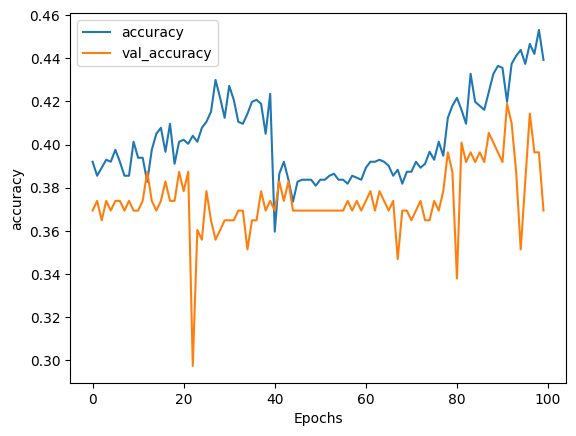

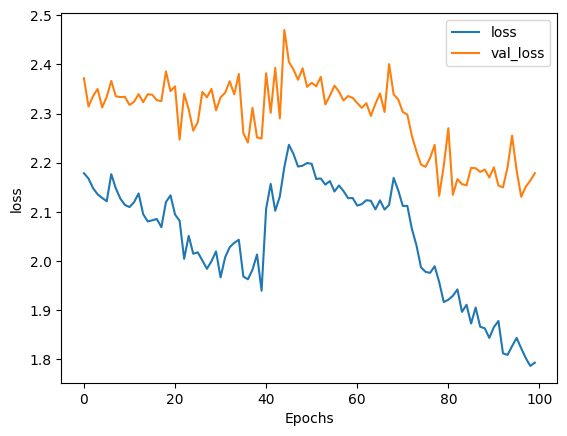

In [17]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')